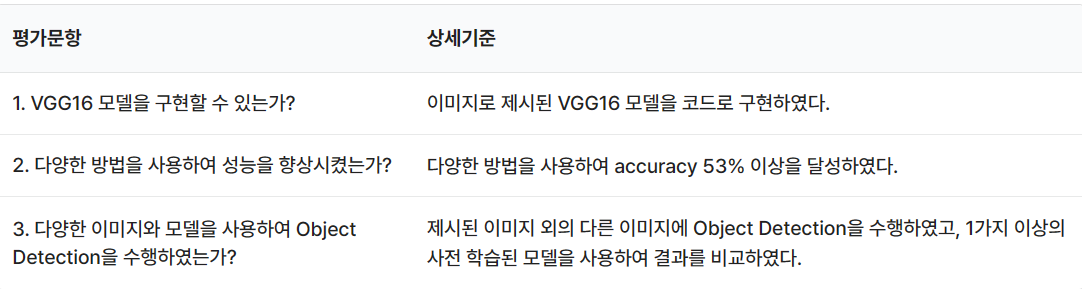

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [19]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [20]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [21]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [22]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [23]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [24]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [25]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

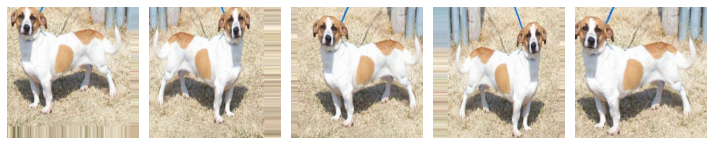

In [27]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [28]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [29]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


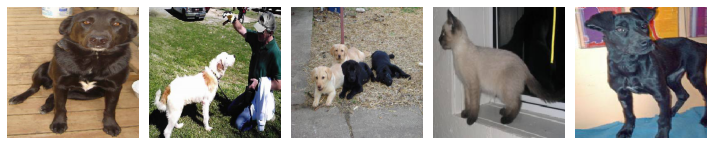

In [30]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [31]:
_[:5] # 정답 데이터

array([1., 1., 1., 0., 1.], dtype=float32)

## 1-1. VGG16 모델 구현하기

In [10]:
# 모델
# [[YOUR CODE]]
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928 

In [18]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [19]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 38s 262ms/step - loss: 26.4206 - binary_accuracy: 0.5140 - val_loss: 0.6921 - val_binary_accuracy: 0.5030
Epoch 2/5
125/125 [==============================] - 31s 251ms/step - loss: 0.6931 - binary_accuracy: 0.4865 - val_loss: 0.6968 - val_binary_accuracy: 0.4930
Epoch 3/5
125/125 [==============================] - 32s 252ms/step - loss: 0.7923 - binary_accuracy: 0.4855 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 4/5
125/125 [==============================] - 32s 255ms/step - loss: 0.7019 - binary_accuracy: 0.4900 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 5/5
125/125 [==============================] - 34s 270ms/step - loss: 0.6940 - binary_accuracy: 0.4915 - val_loss: 0.6933 - val_binary_accuracy: 0.5000


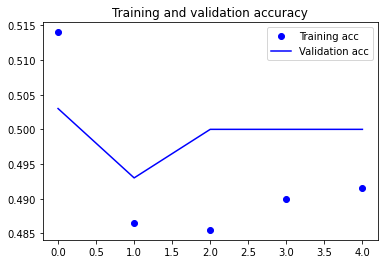

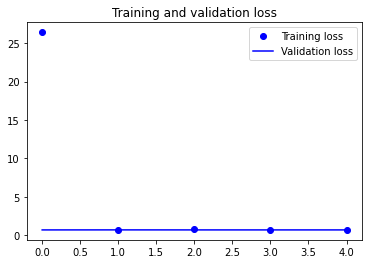

In [20]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 1-2. 다양한 방법을 사용하여 모델의 성능 올리기

In [32]:
# hyperparameter 설정
# [[YOUR CODE]]
batch_size = 32
epochs = 40
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [33]:
# 데이터 generator 생성
# [[YOUR CODE]] 
image_gen_train = ImageDataGenerator(rescale=1./255,        
                                     rotation_range=10,       # 회전반경
                                     width_shift_range=0.1,   # 너비반경 
                                     height_shift_range=0.1,  # 높이반경 
                                     shear_range = 0.1,       # 층 밀림 강도 
                                     zoom_range=0.1,          # 확대 범위
                                     horizontal_flip=True,    # 좌우반전
                                     vertical_flip=False)      # 상하반전


REF) Image Data Generator 파라미터    
https://keras.io/api/preprocessing/image/   
https://acdongpgm.tistory.com/169     
https://en-percent.tistory.com/8 

In [34]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [34]:
train_data_gen[0][0].shape

(8, 256, 256, 3)

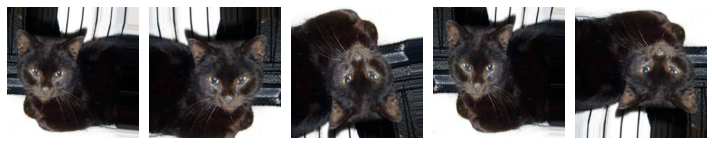

In [35]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [35]:
# 모델 구현
# [[YOUR CODE]]
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
#1
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
#2
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
#3
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
#4
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
#5
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
# x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)
#6
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 128)     1475

REF) VGG16   
https://yazaki.tistory.com/24

In [36]:
# loss function, optimizer, metric 설정 및 모델 컴파일
# [[YOUR CODE]]
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [37]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/40
62/62 [==============================] - 64s 870ms/step - loss: 1.0001 - binary_accuracy: 0.5830 - val_loss: 0.7639 - val_binary_accuracy: 0.5000
Epoch 2/40
62/62 [==============================] - 41s 644ms/step - loss: 0.6730 - binary_accuracy: 0.6315 - val_loss: 0.8823 - val_binary_accuracy: 0.5000
Epoch 3/40
62/62 [==============================] - 43s 675ms/step - loss: 0.6105 - binary_accuracy: 0.6880 - val_loss: 0.7114 - val_binary_accuracy: 0.5000
Epoch 4/40
62/62 [==============================] - 43s 689ms/step - loss: 0.5899 - binary_accuracy: 0.7030 - val_loss: 0.8730 - val_binary_accuracy: 0.5000
Epoch 5/40
62/62 [==============================] - 41s 642ms/step - loss: 0.5757 - binary_accuracy: 0.7090 - val_loss: 1.8873 - val_binary_accuracy: 0.5000
Epoch 6/40
62/62 [==============================] - 40s 639ms/step - loss: 0.5710 - binary_accuracy: 0.7105 - val_loss: 2.2225 - val_binary_accuracy: 0.5000
Epoch 7/40
62/62 [==============================] - 44s 70

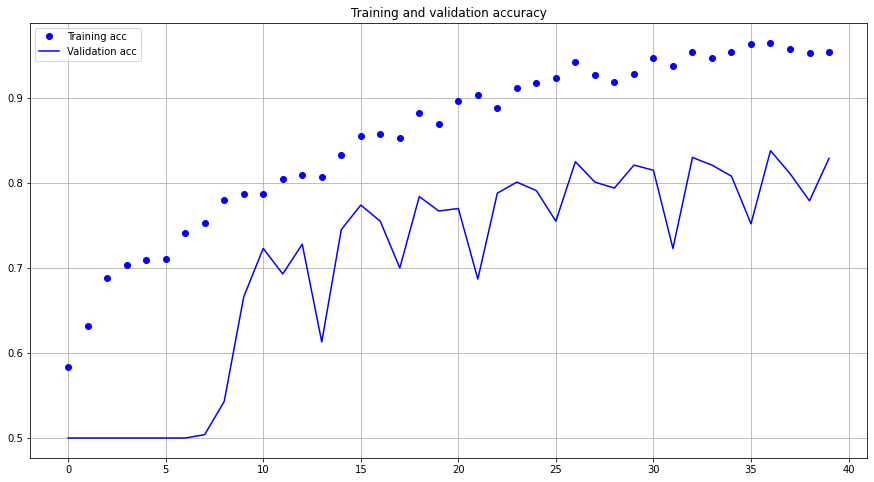

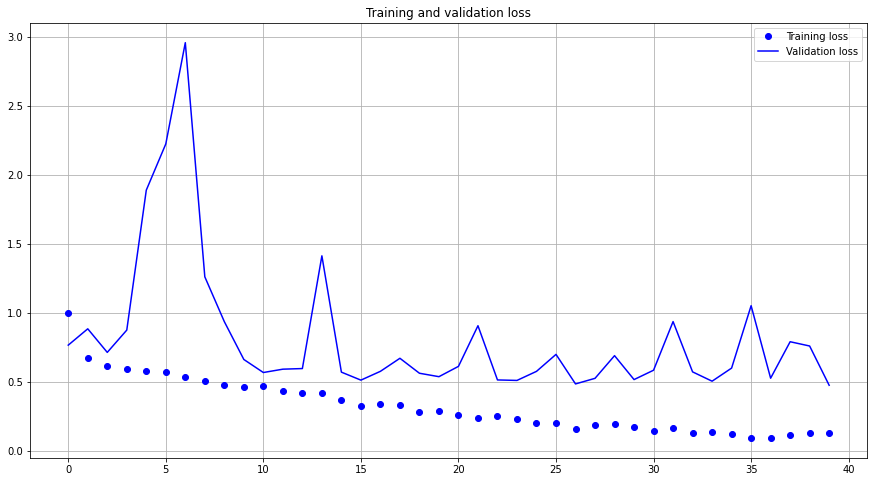

In [38]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15,8))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure(figsize=(15,8))

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

## 회고

<헤맸던 것>
- softmax 쓰고 accuracy가 0.5에서 변하지 않았는데, 한참을 왜 그런지 몰랐다. 
- dropout을 어느 위치에 넣을지 몰라 계속 위치를 바꿔보았다. 
- 픽셀의 스케일을 0~1사이로 바꿔주는 시도를 해봤는데, 하필 softmax와 함께 써서 효과 없는줄 알고 지워버렸다. 
- 이미지 사이즈를 바꿨더니 InvalidArgumentError가 났다. 
- batch size를 128로 했더니 ResourceExhaustedError가 났다. 

<새롭게 알게된 것>
- softmax는 다중분류에 사용되는데, 주어진 문제는 고양이/강아지 이진분류라 sigmoid가 적합하다. 
- dropout 쓴다고 무조건 모델 성능이 좋아지지는 않는다. 
- dropout을 꼭 매 층마다 넣어줄 필요는 없다. 
- 충분한 만큼의 epoch을 실행해봐야한다. 
- ResourceExhaustedError는 batch size를 줄이거나 입력 데이터의 사이즈를 줄여야한다. 

<아직도 모르는 것>
- epoch 중간 지점에서 accuracy가 잘 나오길래, epoch을 줄여보았더니 accruacy가 변했다. 왜 그런지 모르겠다. 
- loss가 저렇게 낮은데, 어떻게 아직도 accuracy는 저렇게 낮은지
- 층이 깊어질수록 숫자가 커지게 짜는 코드가 있고, 작아지게 짜는 코드가 있는데 무슨 차이인지 모르겠다. 
- callback으로 Learning Rate Scheduler, Tensorboard 써보고 싶은데, 엄두가 안난다. 

## 해봤던 시도들 

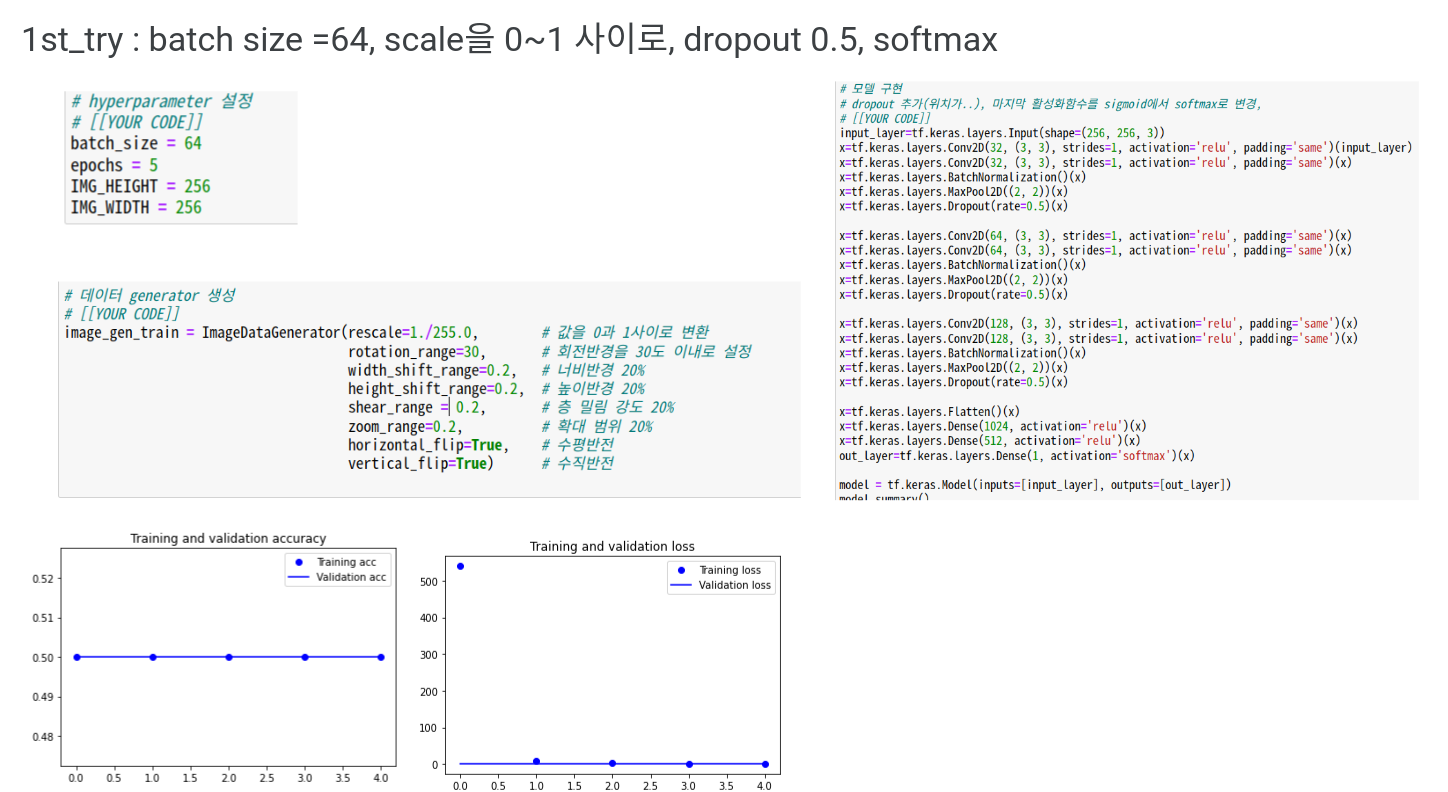

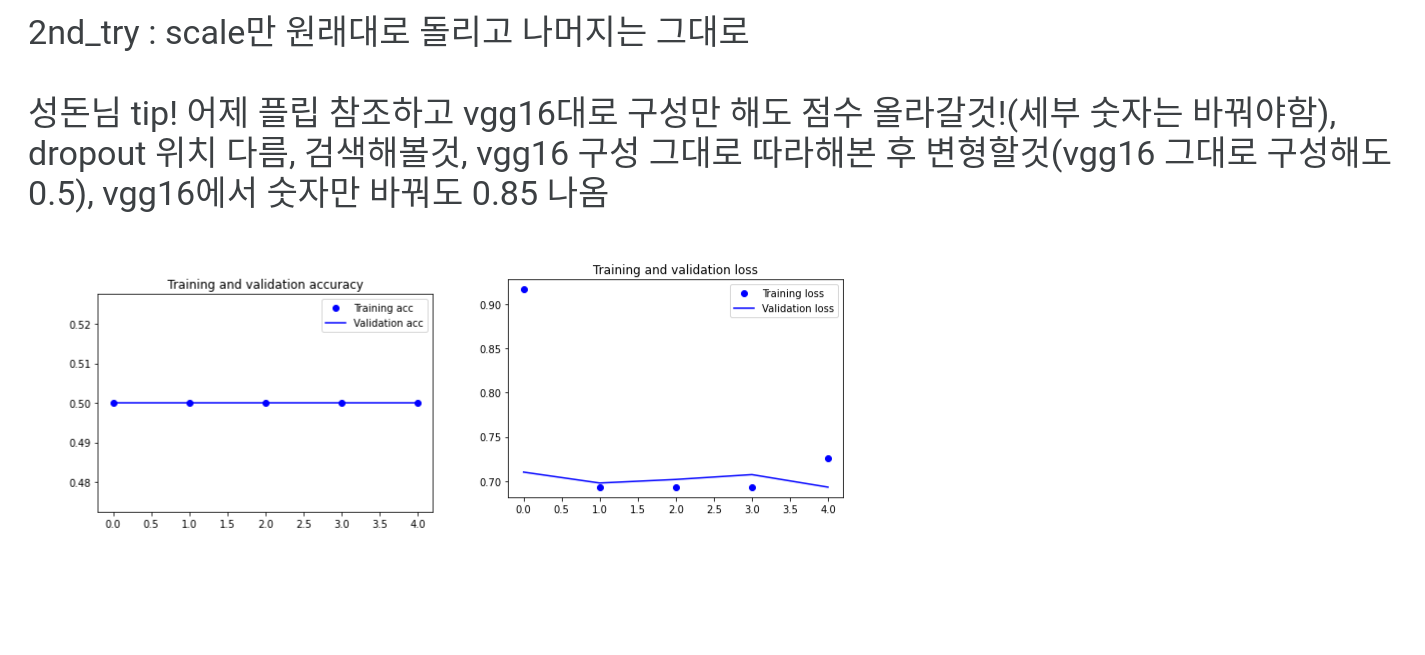

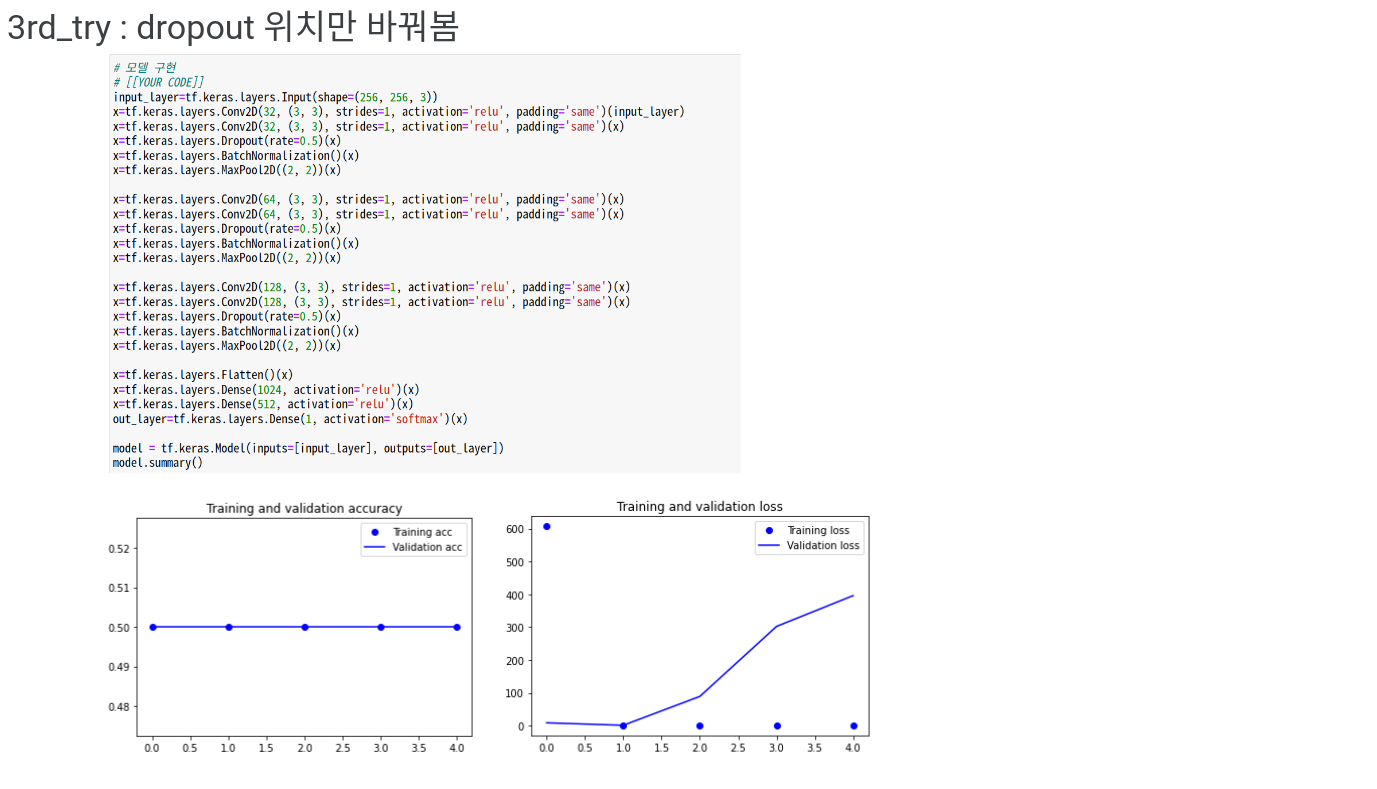

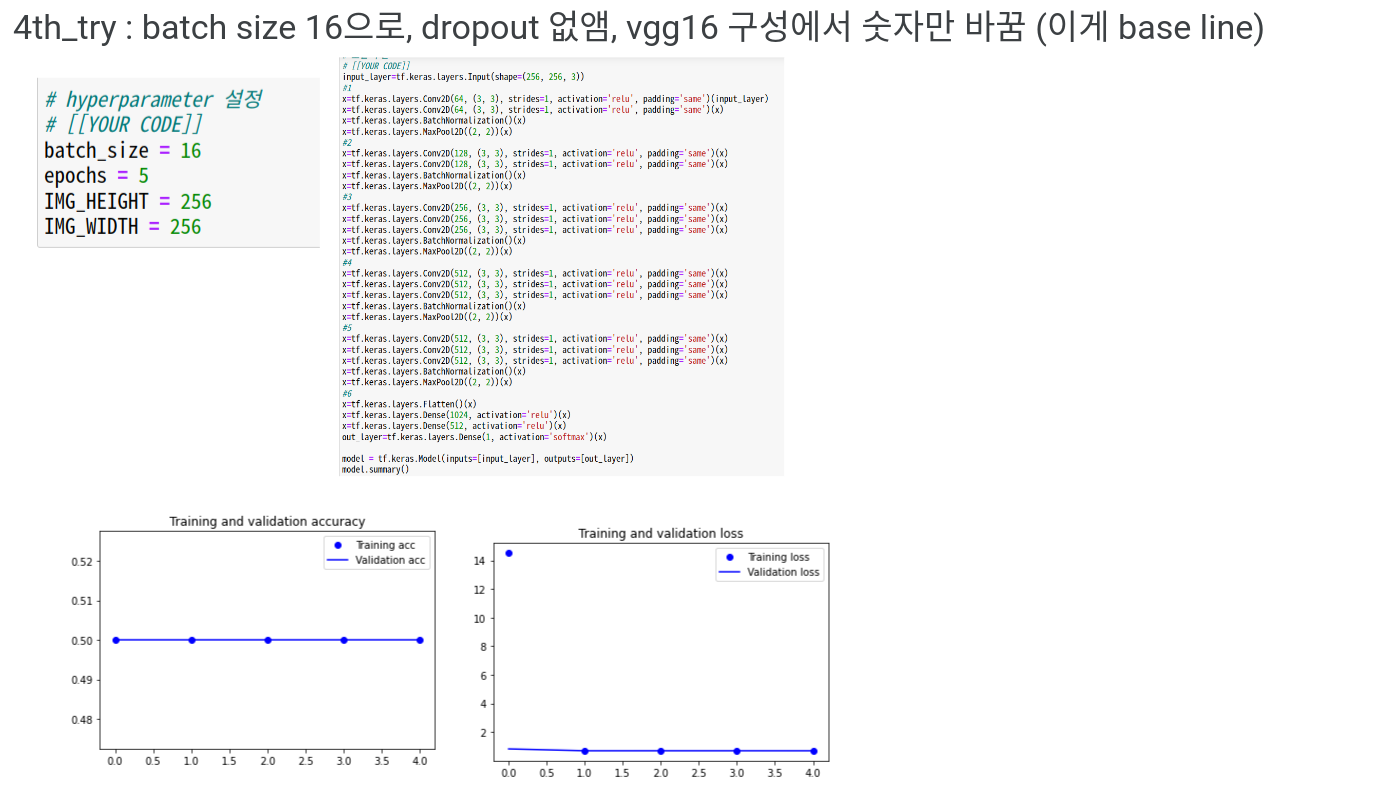

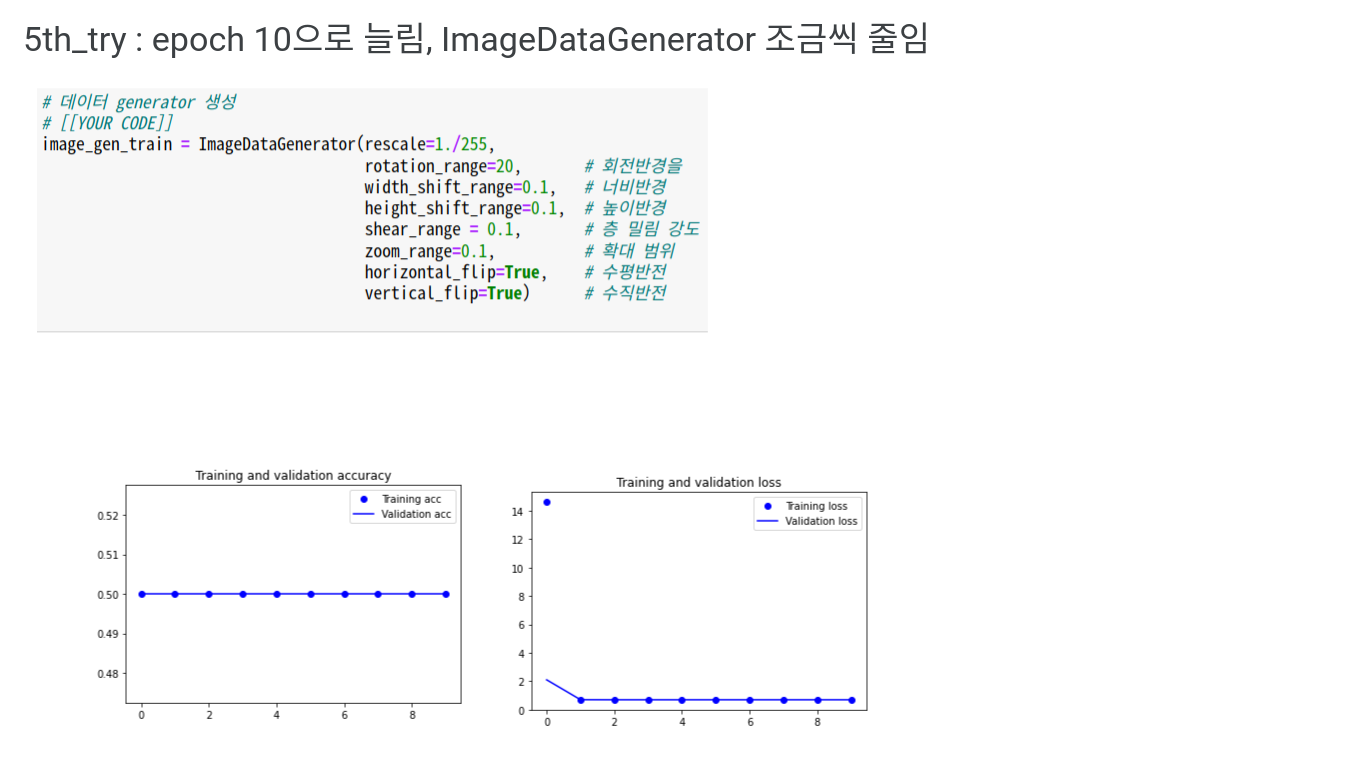

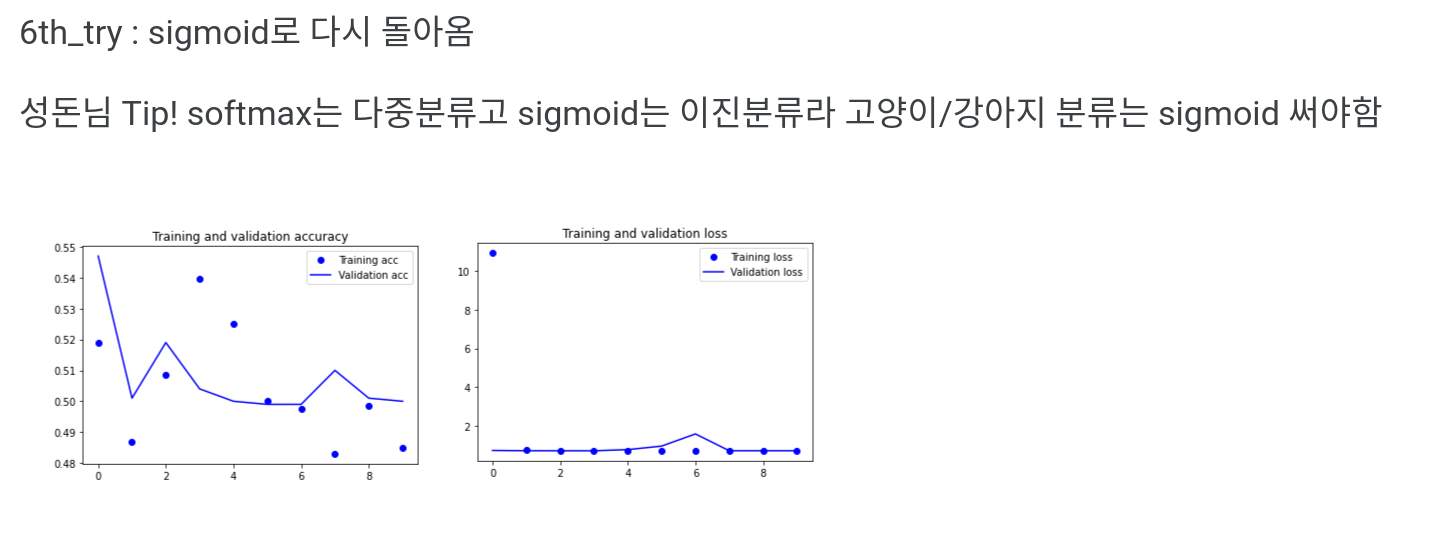

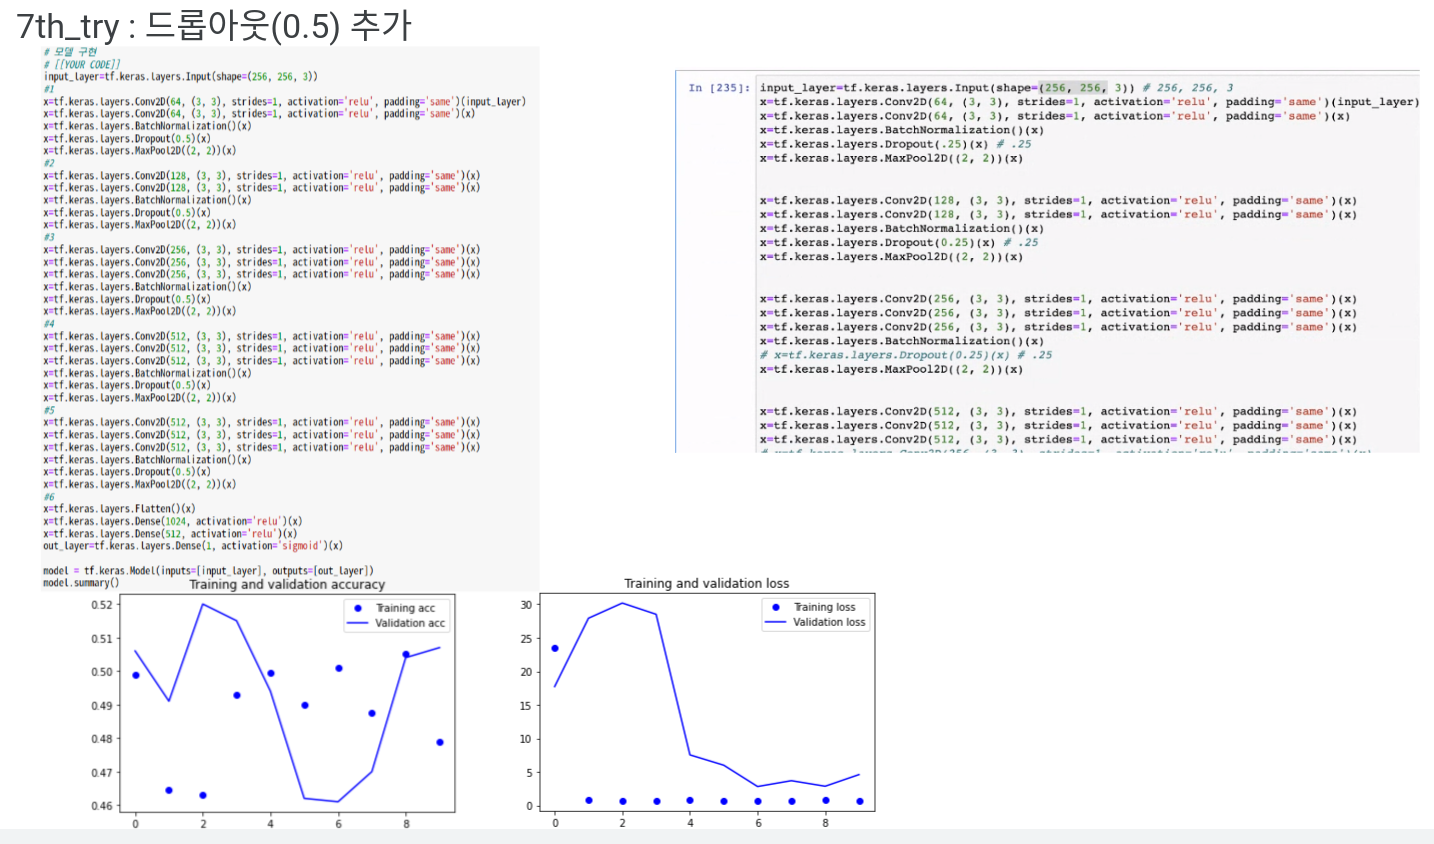

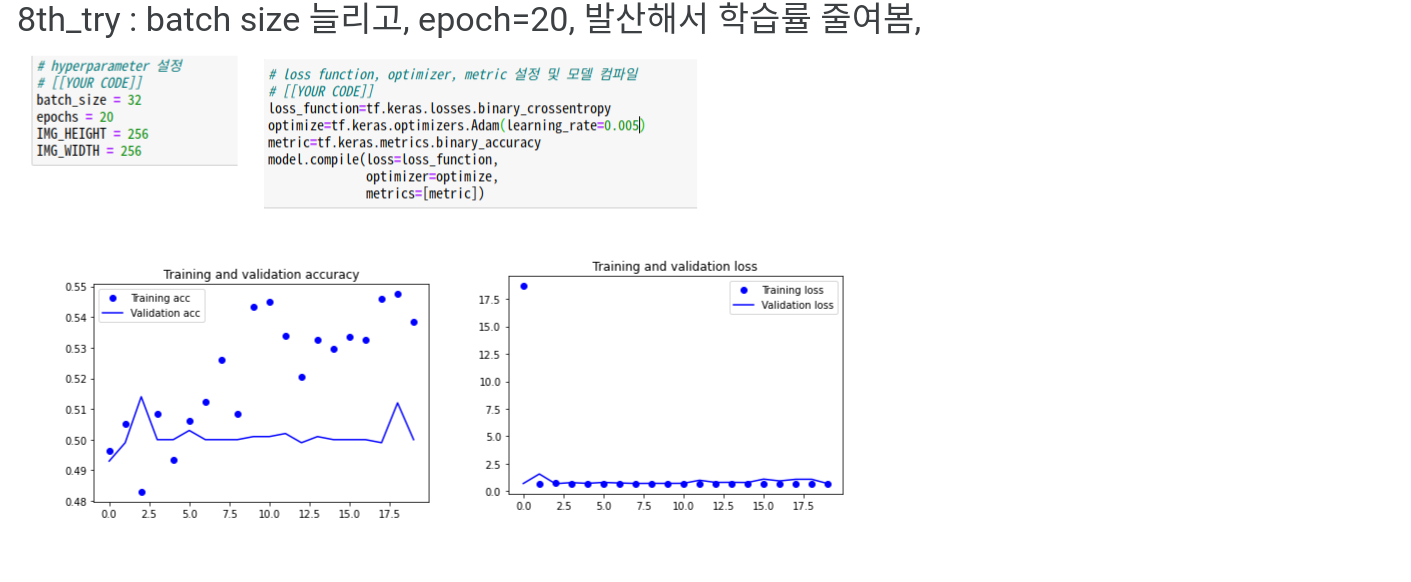

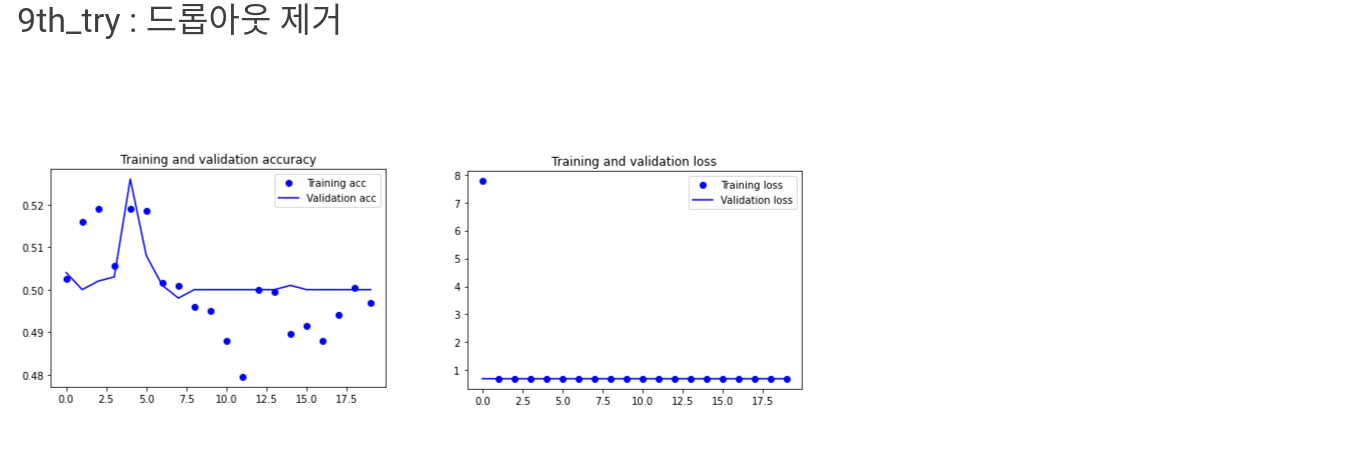

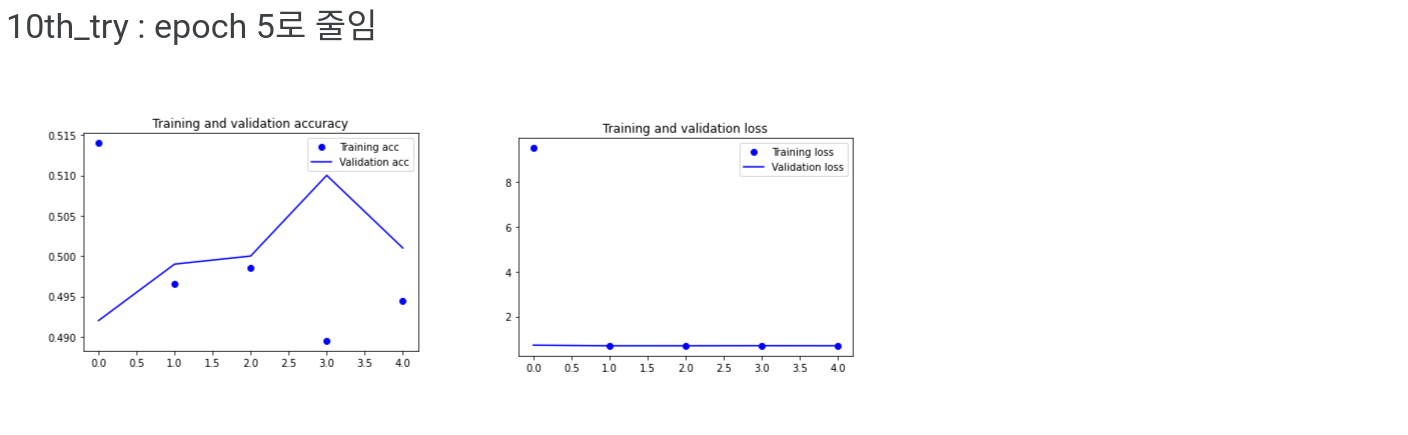

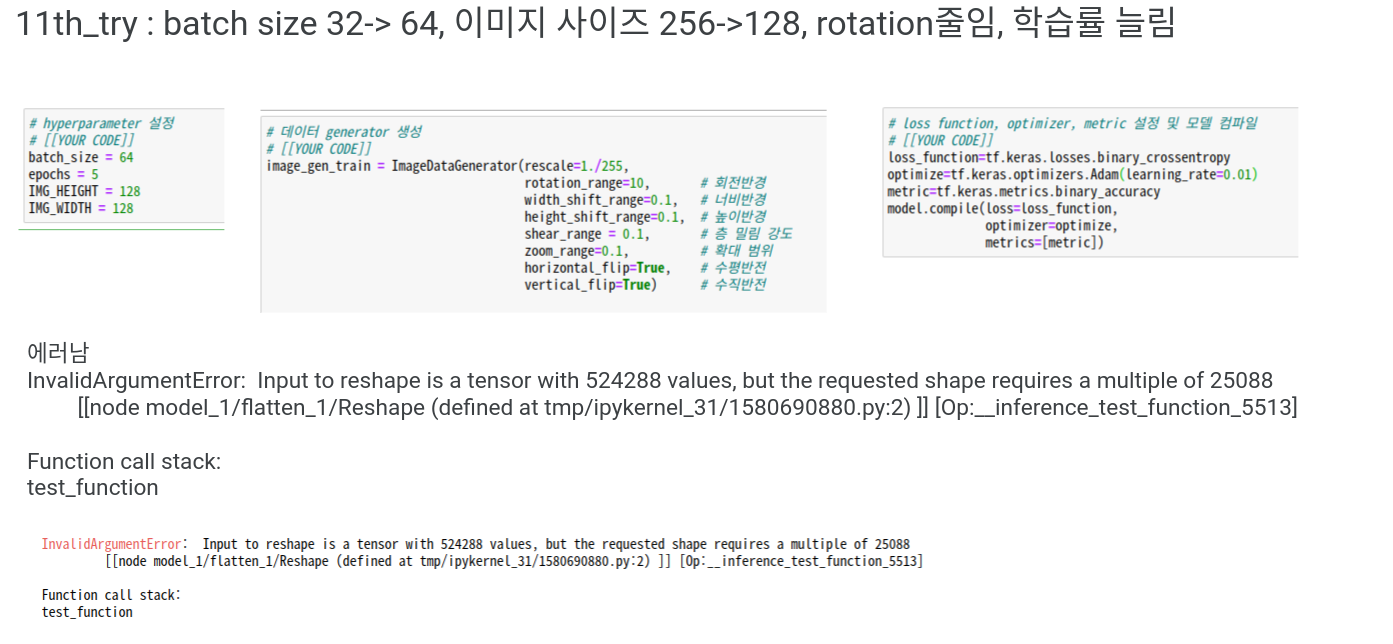

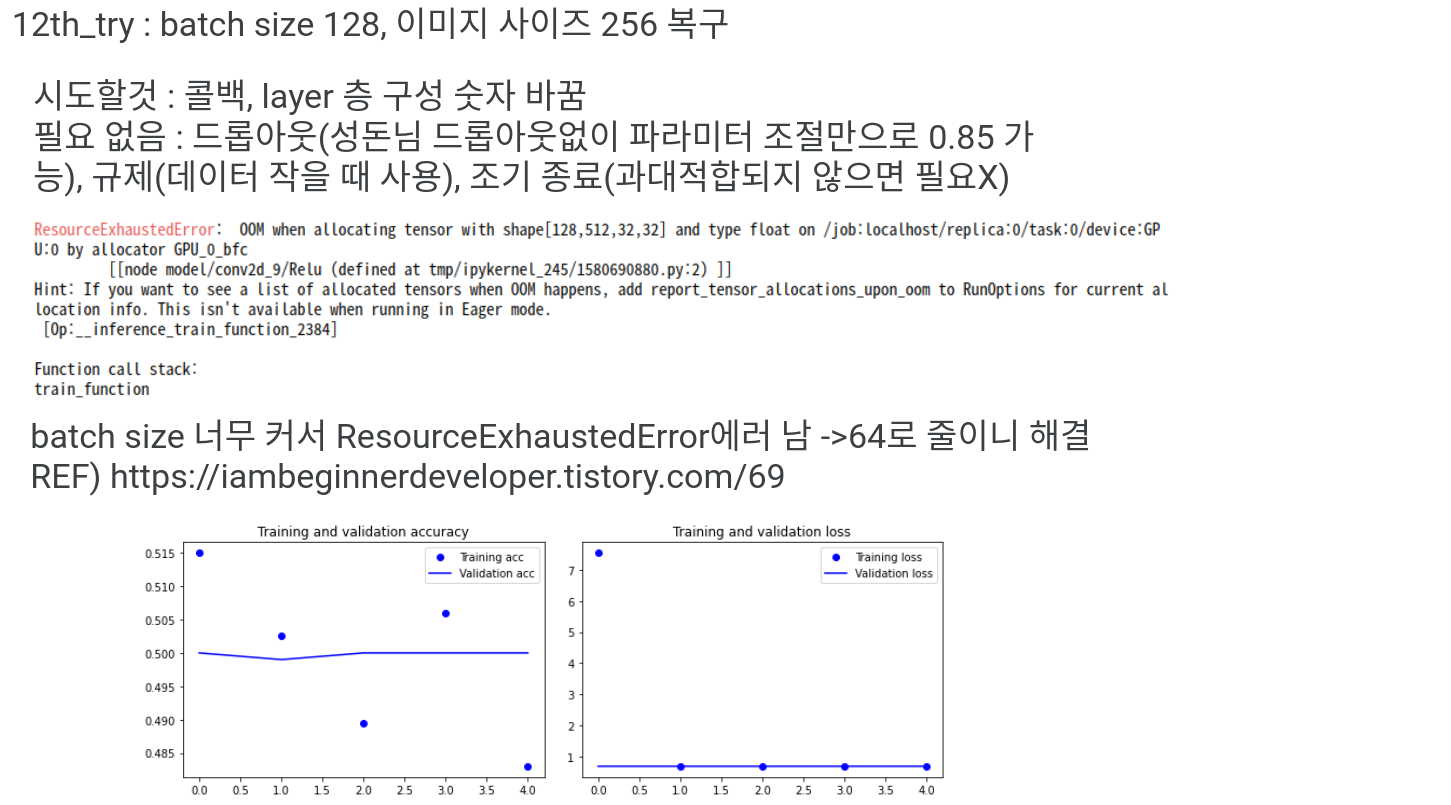

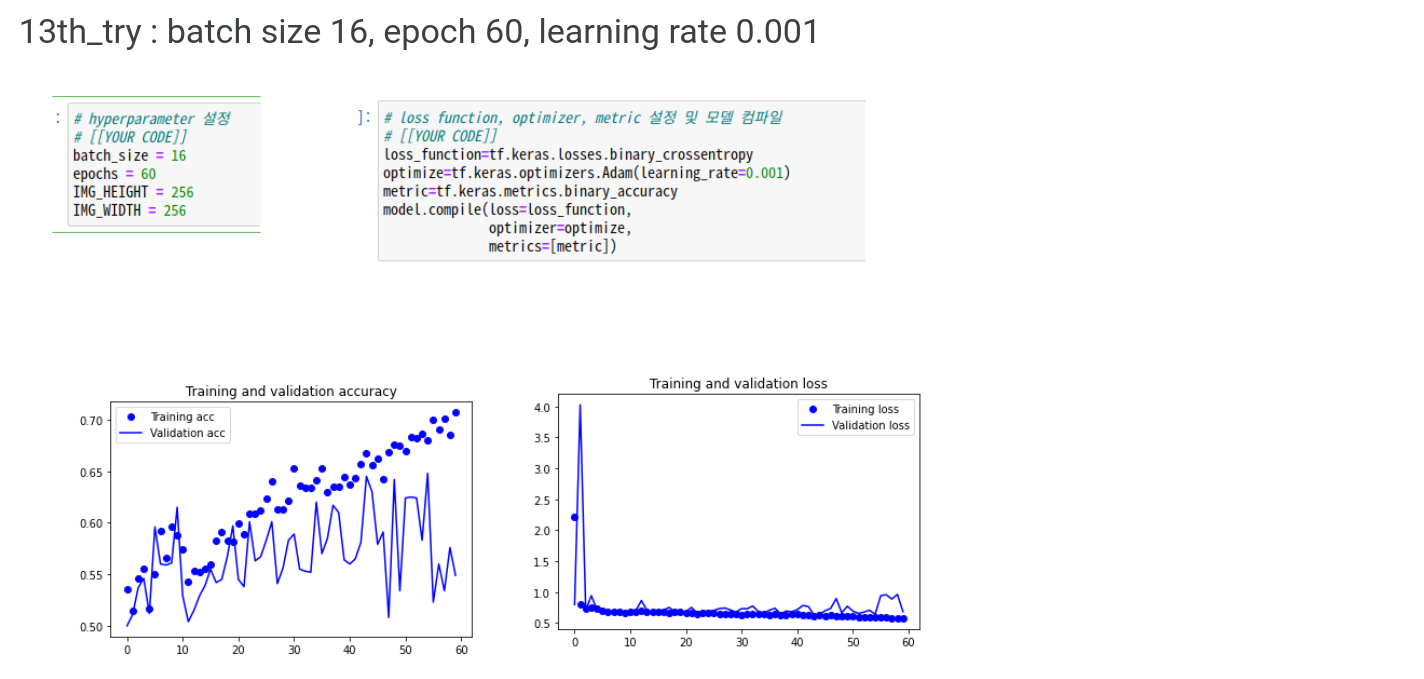